In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start='2020-01-01', end='2024-01-01')
df = df[['Close']]
df

C:\Users\user\AppData\Local\Temp\ipykernel_7780\2415023513.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620842
2020-01-03,71.914818
2020-01-06,72.487831
2020-01-07,72.146927
2020-01-08,73.307503
...,...
2023-12-22,192.192535
2023-12-26,191.646545


In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
X = []
y = []

for i in range(1, len(scaled_data)):
    X.append(scaled_data[i-1])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)


array([[0.12820372],
       [0.1232419 ],
       [0.12726894],
       ...,
       [0.96469758],
       [0.96539536],
       [0.9683953 ]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [13]:
# 5. Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error' , metrics = ['accuracy'])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0012 - loss: 0.1796  
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 4.0555e-04 - loss: 0.0035
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0010 - loss: 0.0012  
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 2.2717e-04 - loss: 4.4185e-04
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 2.5512e-04 - loss: 4.2967e-04
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0013 - loss: 3.5208e-04  
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 4.0555e-04 - loss: 3.5807e-04
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0011 - loss: 3.8206e-04  
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 7.3538e-04 - loss: 3.7899e-04
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0016 - loss: 3.9267e-04   
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0015 - loss: 3.9914e-04 
Epoch 12/5

In [16]:
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


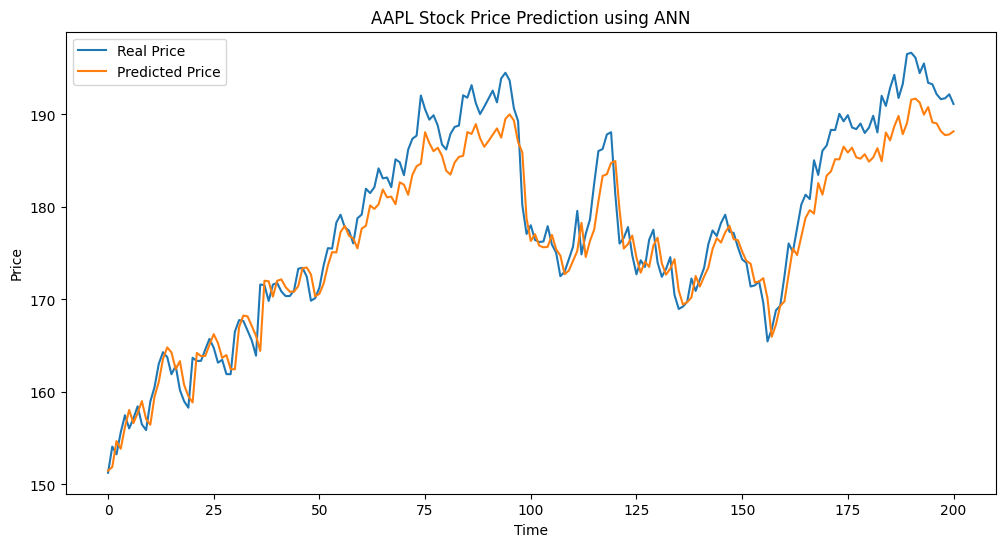

In [17]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'{stock_symbol} Stock Price Prediction using ANN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()